In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# data is from MakeoverMonday 2020/W12, which asks the question: How have course offerings shifted over the past century?

In [2]:
# Thank stackoverflow for fixing the error: "'utf-8' codec can't decode byte 0xa2 in position 26: invalid start byte"
Cali = pd.read_csv('Courses_Berkeley_2018-01-15.csv', encoding='unicode_escape') 
Cali.head(20)

,Year,Field,Name,Number,Area,GenArea,Description,Profs1,Profs2,Fall,Winter,Spring,Summer,Taught
0,1967,Aerospace Studies,Officer Basic Military Training,22,Aeronautical Engineering,Engineering,(6) Study of world military systems and basic...,NaN,NaN,False,False,False,False,False
1,2011,Public Health,"Drugs, Health, and Society",103,Health Sciences,Professional,(2) Two hours of lecture and one hour of disc...,NaN,NaN,False,False,True,False,True
2,2011,Public Health,"Policy, Planning , and Evaluation of Health Pr...",105,Health Sciences,Professional,Three hours of lecture/discussion per week. T...,NaN,NaN,True,False,True,False,True
3,2011,Public Health,Cognitive Science C1 Molecularand Cell Biology...,1B,Health Sciences,Professional,The course will survey the field of the human...,NaN,NaN,True,False,True,False,True
4,1971,Aerospace Studies,Officer Advanced Military Training,432,Aeronautical Engineering,Engineering,(3) Four weeks advanced officer training cond...,NaN,NaN,False,False,False,False,False
5,2011,Public Health,Introduction to Probability and Statistics in ...,142,Health Sciences,Professional,(4) Three hours of lecture and two hours of d...,NaN,NaN,True,False,False,False,True
6,2011,Public Health,Introduction to Statistical Methods in Computa...,143,Health Sciences,Professional,(4) Three hours of lecture and one hour of la...,NaN,NaN,False,False,True,False,True
7,2011,Public Health,Introduction to Statistical Methods in Computa...,0143,Health Sciences,Professional,(4) Three hours 0 lecture and one hour of lab...,NaN,NaN,False,False,True,False,True
8,2011,Public Health,Statistical Analysis of Continuous Outcom- Data,145,Health Sciences,Professional,(4) Three hours of lecture and two hours of l...,NaN,NaN,False,False,True,False,True
9,2011,Public Health,Introduction to Environmental Health Sciences,1503,Health Sciences,Professional,(3) Three hours of lecture and one hour of di...,NaN,NaN,True,False,True,False,True


In [3]:
# What are the fields of study?
Cali['Field'].unique()

array(['Aerospace Studies', 'Public Health', 'African American Studies',
       'Education', 'Public Policy', 'AfroAmerican Studies',
       'Linguistics', 'Public Speaking',
       'Agricultural and Environmental Chemistry',
       'Agricultural and Resource Economics', 'Range Management',
       'Religious Studies', 'Agricultural Chemistry', 'Resource Sciences',
       'Agricultural Economics', 'Rhetoric',
       'Logic and the Methodology of Science', 'Agricultural Engineering',
       'Agriculture', 'Electrical Engineering',
       'Electrical Engineering and Computer Science', 'Management',
       'Romance Languages and Literatures', 'Romance Philology',
       'Romanic Languages', 'Sanskrit', 'Scandinavian', 'Engineering',
       'Business Administration', 'Agronomy', 'Air Science',
       'Air Science and Tactics', 'American Civilization',
       'American Studies', 'Science and Mathematics Education', 'Anatomy',
       'Mathematics', 'Semitic Languages', 'Cell Physiology',
    

In [3]:
#What is the shape of the data?
Cali.shape

(305670, 14)

In [5]:
# Replace NaNs in Profs1 and Profs2
Cali.fillna(value="Unknown", axis=1)

,Year,Field,Name,Number,Area,GenArea,Description,Profs1,Profs2,Fall,Winter,Spring,Summer,Taught
0,1967,Aerospace Studies,Officer Basic Military Training,22,Aeronautical Engineering,Engineering,(6) Study of world military systems and basic...,Unknown,Unknown,False,False,False,False,False
1,2011,Public Health,"Drugs, Health, and Society",103,Health Sciences,Professional,(2) Two hours of lecture and one hour of disc...,Unknown,Unknown,False,False,True,False,True
2,2011,Public Health,"Policy, Planning , and Evaluation of Health Pr...",105,Health Sciences,Professional,Three hours of lecture/discussion per week. T...,Unknown,Unknown,True,False,True,False,True
3,2011,Public Health,Cognitive Science C1 Molecularand Cell Biology...,1B,Health Sciences,Professional,The course will survey the field of the human...,Unknown,Unknown,True,False,True,False,True
4,1971,Aerospace Studies,Officer Advanced Military Training,432,Aeronautical Engineering,Engineering,(3) Four weeks advanced officer training cond...,Unknown,Unknown,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305665,1969,Zoology,Seminar in Comparative Functional Biology of I...,227,Biology,Natural Sciences,(2) One 2-hour meeting per week. Pr Smith (F),593,9954,True,False,False,False,True
305666,1919,Agriculture,Diseases of Farm Animals (3),100,Agriculture,Professional,Unknown,547,997,True,True,False,False,True
305667,1918,Agriculture,Principles of Dairying,102,Agriculture,Professional,"(Ro ADHOii SE) The secretion of milk, nature ...",549,997,True,False,False,False,True
305668,1917,Agriculture,"Bacteriology of Milk, Sanitary Milk Production...",117,Agriculture,Professional,The production and distribution of the variou...,547,997,True,False,False,False,True


In [3]:
#Look at data types of each column
Cali.dtypes

Year             int64
Field           object
Name            object
Number          object
Area            object
GenArea         object
Description     object
Profs1         float64
Profs2         float64
Fall              bool
Winter            bool
Spring            bool
Summer            bool
Taught            bool
dtype: object

In [3]:
# How many fields in GenArea?
Schools = Cali['GenArea'].value_counts()
Schools

Humanities          85808
Professional        67113
Social Sciences     52421
Natural Sciences    48808
Engineering         38537
Education           12983
Name: GenArea, dtype: int64

In [4]:
# Humanities, Professional, Social Sciences, Natural Sciences, Engineering, Education. Create a viz

# Create a dataframe for each school
Humanities = Cali.loc[Cali['GenArea'] == 'Humanities']
Professional = Cali.loc[Cali['GenArea'] == 'Professional']
Social_Sci = Cali.loc[Cali['GenArea'] == 'Social Sciences']
Natural_Sci = Cali.loc[Cali['GenArea'] == 'Natural Sciences']
Engineering = Cali.loc[Cali['GenArea'] == 'Engineering']
Education = Cali.loc[Cali['GenArea'] == 'Education']

Professional

,Year,Field,Name,Number,Area,GenArea,Description,Profs1,Profs2,Fall,Winter,Spring,Summer,Taught
1,2011,Public Health,"Drugs, Health, and Society",103,Health Sciences,Professional,(2) Two hours of lecture and one hour of disc...,NaN,NaN,False,False,True,False,True
2,2011,Public Health,"Policy, Planning , and Evaluation of Health Pr...",105,Health Sciences,Professional,Three hours of lecture/discussion per week. T...,NaN,NaN,True,False,True,False,True
3,2011,Public Health,Cognitive Science C1 Molecularand Cell Biology...,1B,Health Sciences,Professional,The course will survey the field of the human...,NaN,NaN,True,False,True,False,True
5,2011,Public Health,Introduction to Probability and Statistics in ...,142,Health Sciences,Professional,(4) Three hours of lecture and two hours of d...,NaN,NaN,True,False,False,False,True
6,2011,Public Health,Introduction to Statistical Methods in Computa...,143,Health Sciences,Professional,(4) Three hours of lecture and one hour of la...,NaN,NaN,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305655,1948,Agriculture,Special Study for Advanced Undergraduates,I199,Agriculture,Professional,"charge) - Not to be given, 1949-1950. Smith",2716.0,995.0,True,True,False,False,True
305666,1919,Agriculture,Diseases of Farm Animals (3),100,Agriculture,Professional,NaN,547.0,997.0,True,True,False,False,True
305667,1918,Agriculture,Principles of Dairying,102,Agriculture,Professional,"(Ro ADHOii SE) The secretion of milk, nature ...",549.0,997.0,True,False,False,False,True
305668,1917,Agriculture,"Bacteriology of Milk, Sanitary Milk Production...",117,Agriculture,Professional,The production and distribution of the variou...,547.0,997.0,True,False,False,False,True


In [5]:
# How many subAreas?
SubAreas = Cali['Area'].value_counts()
SubAreas

Biology                     19071
Ethnic Studies              15582
Agriculture                  9907
Education                    9539
Political Science            9188
                            ...  
Development                    45
Agricultural Engineering       35
Dentistry                      21
Demography                     21
Veterinary Science             12
Name: Area, Length: 90, dtype: int64

Let's do some Visualizations!

In [11]:
#add DROPdown menu: https://plotly.com/python/dropdowns/#methods
Humanities['Area'].value_counts()
# Ethnic Studies, Enlighs, Languages Romantic, Languages Germanic, Languages Asian, Music, Cassics, Languages Slavic, Languages Ancient, Languages Arabic, Languages Other, Spanish

Ethnic Studies            15582
English                    8981
Languages Romantic         7899
Languages Germanic         6356
Languages Asian            5632
Music                      5563
Classics                   5197
Languages Slavic           5094
Philosophy                 4781
Spanish                    4566
Art                        3960
Languages Ancient          2664
Languages Other            2294
Comparative Literature     2281
Theater                    2086
Langauges Arabic           1067
Art History                 944
Folklore                    239
Film                        233
Humanities                  225
English Composition          96
Religion                     68
Name: Area, dtype: int64

In [10]:
#Area=Cali.groupby('Area').agg(tot=('Area','sum')).sort_values(by='GenArea',ascending=True)
year_summary=Humanities.groupby(['Year', 'Area']).count()
                                    
year_summary.head(25)

Field  Name  Number  GenArea  Description  Profs1  \
Year Area                                                                    
1900 English                43    43      43       43           41      29   
     Languages Ancient      60    60      60       60           51      54   
     Languages Germanic     18    18      18       18           16      12   
     Languages Romantic     36    36      36       36           27      34   
     Philosophy             16    16      16       16           15      14   
1901 English                51    51      51       51           49      46   
     Languages Ancient      78    78      78       78           67      68   
     Languages Asian        13    13      13       13           13       8   
     Languages Germanic     17    17      17       17           14      15   
     Languages Romantic     47    47      47       47           37      43   
     Languages Slavic        4     4       4        4            4       4   
     Philosophy             17    17      17       17           17      17   
1902 English                49    49      49       49           44      45   
     Languages Ancient     117   117     117      117           97      71   
     Languages Asian        15    15      15       15           15       8   
     Languages Germanic     24    24      24       24           16      23   
     Languages Romantic     81    81      81       81           66      29   
     Languages Slavic        3     3       3        3            3       3   
     Philosophy             16    16      16       16           16      16   
1903 English                52    52      52       52           48      46   
     Languages Ancient      83    83      83       83           77      73   
     Languages Asian        14    14      14       14           14       6   
     Languages Germanic     25    25      25       25           16      25   
     Languages Romantic     35    35      35       35           30      27   
     Languages Slavic        2     2       2        2            2       2   

                         Profs2  Fall  Winter  Spring  Summer  Taught  
Year Area                                                              
1900 English                  2    43      43      43      43      43  
     Languages Ancient        6    60      60      60      60      60  
     Languages Germanic       2    18      18      18      18      18  
     Languages Romantic       7    36      36      36      36      36  
     Philosophy               3    16      16      16      16      16  
1901 English                  6    51      51      51      51      51  
     Languages Ancient        5    78      78      78      78      78  
     Languages Asian          0    13      13      13      13      13  
     Languages Germanic       2    17      17      17      17      17  
     Languages Romantic       8    47      47      47      47      47  
     Languages Slavic         0     4       4       4       4       4  
     Philosophy               5    17      17      17      17      17  
1902 English                  7    49      49      49      49      49  
     Languages Ancient        8   117     117     117     117     117  
     Languages Asian          0    15      15      15      15      15  
     Languages Germanic       3    24      24      24      24      24  
     Languages Romantic       4    81      81      81      81      81  
     Languages Slavic         0     3       3       3       3       3  
     Philosophy               5    16      16      16      16      16  
1903 English                  8    52      52      52      52      52  
     Languages Ancient        6    83      83      83      83      83  
     Languages Asian          0    14      14      14      14      14  
     Languages Germanic       3    25      25      25      25      25  
     Languages Romantic       4    35      35      35      35      35  
     Languages Slavic         0     2       2 

In [12]:
Yr_Human = Cali.loc[Cali['GenArea'] == 'Humanities']

In [ ]:
sns.pairplot(Cali, hue='GenArea', height=5.5)

Text(0.5, 1.0, 'Humanities Majors')

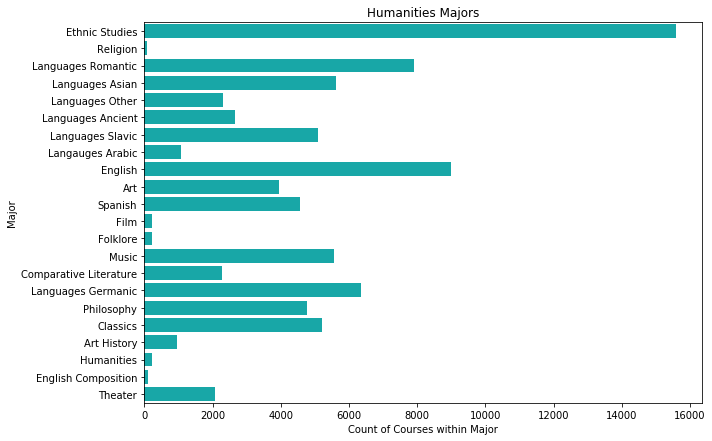

In [6]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(y="Area", data=Humanities, color="c");
plt.ylabel('Major')
plt.xlabel('Count of Courses within Major')
plt.title('Humanities Majors')

Text(0.5, 1.0, 'Social Science Majors')

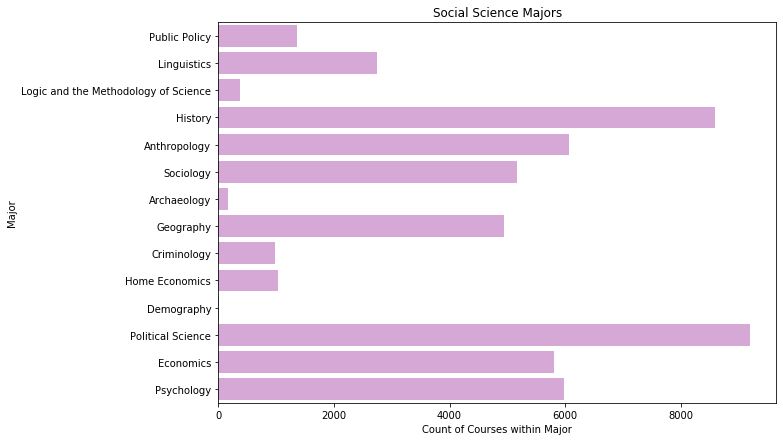

In [7]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(y="Area", data=Social_Sci, color="#DDA0DD");
plt.ylabel('Major')
plt.xlabel('Count of Courses within Major')
plt.title('Social Science Majors')

Text(0.5, 1.0, 'Engineering Majors')

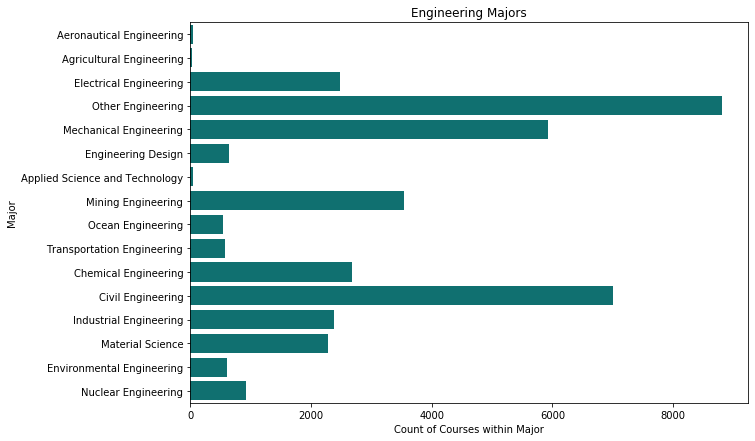

In [8]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(y="Area", data=Engineering, color="#008080");
plt.ylabel('Major')
plt.xlabel('Count of Courses within Major')
plt.title('Engineering Majors')

Text(0.5, 1.0, 'Natural Science Majors')

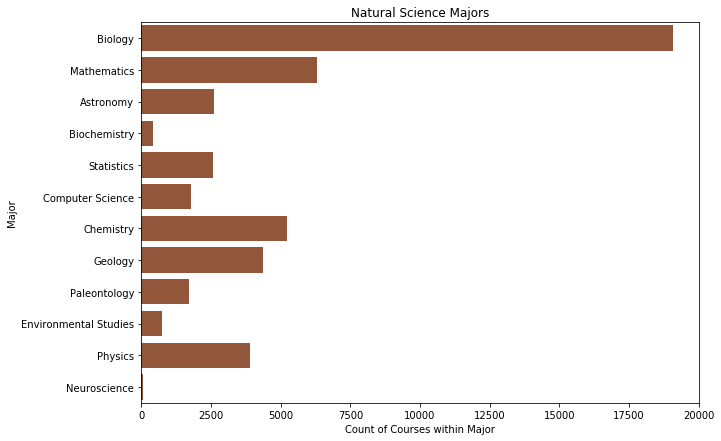

In [9]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(y="Area", data=Natural_Sci, color="#A0522D");
plt.ylabel('Major')
plt.xlabel('Count of Courses within Major')
plt.title('Natural Science Majors')

Text(0.5, 1.0, 'Professional Majors')

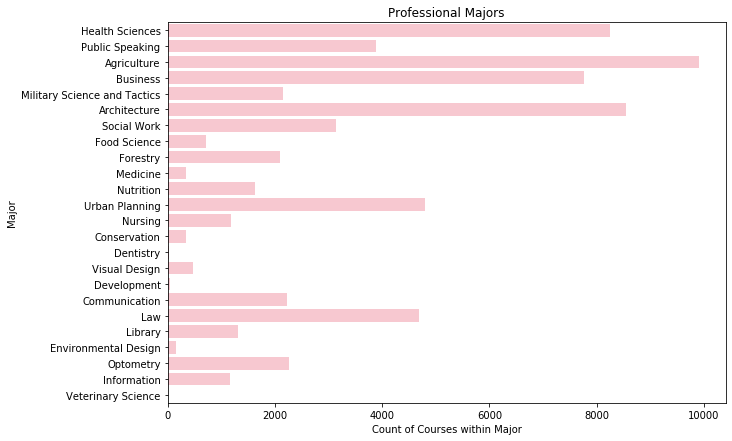

In [10]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(y="Area", data=Professional, color="#FFC0CB");
plt.ylabel('Major')
plt.xlabel('Count of Courses within Major')
plt.title('Professional Majors')

In [11]:
# What are the range of years?
Cali['Year'].unique()

array([1967, 2011, 1971, 1977, 1978, 1992, 1988, 1993, 1994, 1995, 1974,
       1999, 1975, 1979, 2001, 1980, 1981, 2003, 1983, 1986, 2005, 1987,
       2007, 2009, 1989, 1990, 1991, 1976, 1997, 1984, 1985, 1917, 1918,
       1920, 1924, 1925, 1926, 1927, 1931, 1932, 1936, 1939, 1940, 1941,
       1944, 1945, 1946, 1953, 1954, 1955, 1956, 1957, 1958, 1961, 1963,
       1964, 1965, 1966, 1968, 1969, 1928, 1951, 1952, 1970, 1962, 1973,
       1911, 1947, 1912, 1914, 1950, 1915, 1916, 1919, 1921, 1922, 1929,
       1930, 1933, 1934, 1935, 1938, 1937, 1900, 1901, 1902, 1904, 1906,
       1908, 1909, 1943, 1910, 1913, 1942, 1948, 1923, 1903, 1949])

In [12]:
# Find numbers of GenArea per year
By_Yr_GenArea = pd. DataFrame({'count' : Cali.groupby( [ "Year", "GenArea"] ).size()}).reset_index()
By_Yr_GenArea

,Year,GenArea,count
0,1900,Education,29
1,1900,Engineering,71
2,1900,Humanities,173
3,1900,Natural Sciences,143
4,1900,Professional,58
...,...,...,...
583,2011,Engineering,1370
584,2011,Humanities,1875
585,2011,Natural Sciences,696
586,2011,Professional,1888


Text(39.83647569444443, 0.5, 'Majors within GenArea')

<Figure size 1800x2160 with 0 Axes>

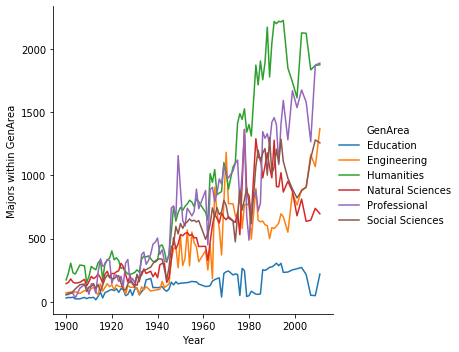

In [13]:
# https://seaborn.pydata.org/tutorial/relational.html
# Original Q: How have course offered changed over the century? Original viz was a complicated pie chart: https://data.world/makeovermonday/2020w12
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(25,30))
sns.relplot(x="Year", y="count", hue="GenArea", kind="line", data=By_Yr_GenArea);
plt.xlabel('Year')
plt.ylabel('Majors within GenArea')

# Interesting: Education never gained much traction. 

Let's take a closer look at classes
Order: GenArea -> Area -> Field -> Name & Number
Next Order: Seasons and Taught

In [14]:
# How many fields are there? Fields and Area are similar, right?
Cali['Field'].value_counts()
Field_Ct = pd. DataFrame({'Field Count' : Cali.groupby( ['Area', "Field"] ).size()}).reset_index()
Field_Ct
# 305 Specialized fields within Areas

,Area,Field,Field Count
0,Aeronautical Engineering,Aerospace Studies,46
1,Agricultural Engineering,Agricultural Engineering,35
2,Agriculture,Agricultural Chemistry,83
3,Agriculture,Agricultural Economics,628
4,Agriculture,Agricultural and Environmental Chemistry,50
...,...,...,...
301,Urban Planning,Planning,2090
302,Urban Planning,Urban Design,15
303,Veterinary Science,Veterinary Science,12
304,Visual Design,Design,445


In [46]:
Cali[Cali['Area'] == 'Ethnic Studies']

,Year,Field,Name,Number,Area,GenArea,Description,Profs1,Profs2,Fall,Winter,Spring,Summer,Taught
22,1992,African American Studies,Africa: History and Culture,4A,Ethnic Studies,Humanities,(4) Three hours of lecture plus one hour of d...,NaN,NaN,True,False,False,False,True
23,1992,African American Studies,Africa: History and Culture,4B,Ethnic Studies,Humanities,(4) Three hours of lecture plus one hour of d...,NaN,NaN,False,False,True,False,True
26,1992,African American Studies,Directed Group Studies for Freshmen and Sophom...,98,Ethnic Studies,Humanities,(1-4) Course may be repeated for credit. Must...,NaN,NaN,True,False,True,False,True
27,1992,African American Studies,Directed Group Studies for Freshmen and Sophom...,99,Ethnic Studies,Humanities,"Must,be taken on a passed/not passed basis. S...",NaN,NaN,True,False,True,False,True
30,1992,African American Studies,African- American Economic History,110A,Ethnic Studies,Humanities,(3) Three hours of lecture per week. Pr Empha...,NaN,NaN,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287090,2005,Ethnic Studies,Supervised Independent Study and Research,199,Ethnic Studies,Humanities,(1-4) Course may be repeated for credit. Enro...,18940.0,18060.0,True,True,True,False,True
287326,2011,Ethnic Studies,Contemporary military,135,Ethnic Studies,Humanities,(4) Three hours of lecture and zero to one ho...,18940.0,18577.0,True,False,True,False,True
287972,2011,Ethnic Studies,Supervised Independent Study and Research,199,Ethnic Studies,Humanities,(1-4) Course may be repeated for credit. Enro...,14465.0,19386.0,True,True,True,False,True
287973,2007,Ethnic Studies,Supervised Independent Study and Research,199,Ethnic Studies,Humanities,(1-4) Course may be repeated for credit. Enro...,11499.0,19386.0,True,True,True,False,True


In [64]:
# Lets try widgets! Especially if it does not break the kernel
import datetime
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact, interactive

month = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=12.0,
    step=1.0,
    description='Month:',
    continuous_update=False
)

use_date = widgets.Checkbox(
    description='Date: ',
    value=True,
)
container = widgets.HBox(child=[use_date, month])

def f(x):
    print(x)
    
Gen_Area = interact(f, x=widgets.Dropdown(
    description='School of :   ',
    value='Humanities',
    options=Cali['GenArea'].unique().tolist()
)),

Area = interact(f, x=widgets.Dropdown(
    description='Major :   ',
    value='Ethnic Studies',
    options=Cali['Area'].unique().tolist()
)),

Field = interact(f, x=widgets.Dropdown(
description='Fields within Selected Major: ',
            value='African American Studies',
options=Cali['Field'].unique().tolist()
));

#Year Slider
Year_Choice = widgets.IntRangeSlider(
    value=[1900,2018],
    min=1900,
    max=2018,
    step=1,
        description='Year:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(Year_Choice)
###_______________________Below did not work as expected

def validate():
    if Gen_Area.value in Cakli['GenArea'].unique() and Area.value in Cali['Area'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(Cali['Year'] == Year_Choice.value, Cali['Area'] == Area.value,
                               Cali['GenArea'] == Gen_Area.value)]
            temp_df = Cali[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(Cali['Field'] == 'African American Studies', Cali['Area'] == Area.value)]
            temp_df = Cali[filter_list]
        x1 = temp_df['arr_delay']
        x2 = temp_df['dep_delay']
        with g.batch_update():
            g.data[0].x = x1
            g.data[1].x = x2
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Delay in Minutes'
            g.layout.yaxis.title = 'Number of Delays'




interactive(children=(Dropdown(description='School of :   ', index=2, options=('Engineering', 'Professional', …

interactive(children=(Dropdown(description='Major :   ', index=2, options=('Aeronautical Engineering', 'Health…

interactive(children=(Dropdown(description='Fields within Selected Major: ', index=2, options=('Aerospace Stud…

IntRangeSlider(value=(1900, 2018), continuous_update=False, description='Year:', max=2018, min=1900)

In [26]:
# Continue on: https://plotly.com/python/figurewidget-app/#reference
# To display the majors by GenArea, you'll need to make it a separate Dataframe, like how you graphed GenArea over years

In [47]:
# Put GenArea into tab??
tab_contents = ['Education', 'Engineering', 'Humanities', 'Natural Sciences', 'Professional', 'Social Sciences']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
tab.titles = [str(i) for i in range(len(children))]
tab

In [18]:
# Create widget label
widgets.HBox([widgets.Label(value="The $m$ in $E=mc^2$:"), widgets.FloatSlider()])

In [82]:
# plotly widgets: https://plotly.com/python/figurewidget-app/#reference
# Docs for widgets: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

accordion = widgets.Accordion(children=[widgets.IntSlider(), widgets.Text()], titles=('Slider', 'Text'))
accordion

Accordion(children=(IntSlider(value=0), Text(value='')))

In [22]:
# Create a 'major breakdown' by school
Prof_Majors = pd.DataFrame({'count': Professional.groupby(["Area"]).size()}).reset_index()
Soc_Sci_Majors = pd.DataFrame({'count': Social_Sci.groupby("Area").size()}).reset_index()
Nat_Sci_Majors = pd.DataFrame({'count': Natural_Sci.groupby("Area").size()}).reset_index()
Eng_Majors = pd.DataFrame({'count': Engineering.groupby("Area").size()}).reset_index()
Edu_Majors = pd.DataFrame({'count': Education.groupby("Area").size()}).reset_index()
Hum_Majors = pd.DataFrame({'count' : Humanities.groupby( ["Area"] ).size()}).reset_index()
Hum_Majors

,Area,count
0,Art,3960
1,Art History,944
2,Classics,5197
3,Comparative Literature,2281
4,English,8981
5,English Composition,96
6,Ethnic Studies,15582
7,Film,233
8,Folklore,239
9,Humanities,225


In [16]:
# Display Idea: By_Yr_GenArea then breakdown of majors within Schools then further breakdown by Field and eventually a graphic of taught and which semester
Hum_Fields = pd.DataFrame({'count' : Humanities.groupby( ["Field"] ).size()}).reset_index()
Hum_Fields.head(25)
# Condense fields that are essentially the same thing? Looks like humanities has the most, Eng, Soc Sci, Prof, Natural Sci have 25 or less. Edu has 6

,Field,count
0,African American Studies,769
1,AfroAmerican Studies,811
2,American Studies,134
3,Arabic,111
4,Art,1756
5,Asian American Studies,815
6,Asian American Studies Program,29
7,Asian American and Asian Diaspora Studies,41
8,Asian Studies,214
9,Buddhist Studies,882


In [56]:
Edu_Fields = pd.DataFrame({'count' : Education.groupby( ["Field"] ).size()}).reset_index()
Eng_Fields = pd.DataFrame({'count' : Engineering.groupby( ["Field"] ).size()}).reset_index()
Prof_Fields = pd.DataFrame({'count' : Professional.groupby( ["Field"] ).size()}).reset_index
Nat_Fields = pd.DataFrame({'count' : Natural_Sci.groupby( ["Field"] ).size()}).reset_index()
Soc_Fields = pd.DataFrame({'count' : Social_Sci.groupby( ["Field"] ).size()}).reset_index()
Edu_Fields.head(25)

,Field,count
0,Education,9215
1,Human Biodynamics,77
2,Mathematics Education,189
3,Physical Culture,115
4,Physical Education,2190
5,Physical Education for Women,1062
6,Science and Mathematics Education,135


In [25]:
Cali.head(10)
# Accordion stacked would be good if I selected field and then can see the classes ['Name'] that falls under it

,Year,Field,Name,Number,Area,GenArea,Description,Profs1,Profs2,Fall,Winter,Spring,Summer,Taught
0,1967,Aerospace Studies,Officer Basic Military Training,22,Aeronautical Engineering,Engineering,(6) Study of world military systems and basic...,NaN,NaN,False,False,False,False,False
1,2011,Public Health,"Drugs, Health, and Society",103,Health Sciences,Professional,(2) Two hours of lecture and one hour of disc...,NaN,NaN,False,False,True,False,True
2,2011,Public Health,"Policy, Planning , and Evaluation of Health Pr...",105,Health Sciences,Professional,Three hours of lecture/discussion per week. T...,NaN,NaN,True,False,True,False,True
3,2011,Public Health,Cognitive Science C1 Molecularand Cell Biology...,1B,Health Sciences,Professional,The course will survey the field of the human...,NaN,NaN,True,False,True,False,True
4,1971,Aerospace Studies,Officer Advanced Military Training,432,Aeronautical Engineering,Engineering,(3) Four weeks advanced officer training cond...,NaN,NaN,False,False,False,False,False
5,2011,Public Health,Introduction to Probability and Statistics in ...,142,Health Sciences,Professional,(4) Three hours of lecture and two hours of d...,NaN,NaN,True,False,False,False,True
6,2011,Public Health,Introduction to Statistical Methods in Computa...,143,Health Sciences,Professional,(4) Three hours of lecture and one hour of la...,NaN,NaN,False,False,True,False,True
7,2011,Public Health,Introduction to Statistical Methods in Computa...,0143,Health Sciences,Professional,(4) Three hours 0 lecture and one hour of lab...,NaN,NaN,False,False,True,False,True
8,2011,Public Health,Statistical Analysis of Continuous Outcom- Data,145,Health Sciences,Professional,(4) Three hours of lecture and two hours of l...,NaN,NaN,False,False,True,False,True
9,2011,Public Health,Introduction to Environmental Health Sciences,1503,Health Sciences,Professional,(3) Three hours of lecture and one hour of di...,NaN,NaN,True,False,True,False,True


In [70]:
By_Yr_GenArea.tail

<bound method NDFrame.tail of      Year           GenArea  count
0    1900         Education     29
1    1900       Engineering     71
2    1900        Humanities    173
3    1900  Natural Sciences    143
4    1900      Professional     58
..    ...               ...    ...
583  2011       Engineering   1370
584  2011        Humanities   1875
585  2011  Natural Sciences    696
586  2011      Professional   1888
587  2011   Social Sciences   1257

[588 rows x 3 columns]>

In [81]:
# Original Q: How have course offered changed over the century? Original viz was a complicated pie chart: https://data.world/makeovermonday/2020w12

# import libraries
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact, interactive
import datetime



fig = px.line(By_Yr_GenArea, x='Year', y='count', color='GenArea', title='Number of Majors within each school over time')

fig.update_xaxes(rangeslider_visible=True, autorange=True, range=['1900-01-01', '2011-12-31'] )
fig.show()
# Interesting: Education never gained much traction. 

In [39]:
import plotly.graph_objects as go
import pandas as pd

# Init figure
fig = go.Figure()

x1=Hum_Majors['Area']
y1= Hum_Majors['count']
x2 = Prof_Majors['Area']
y2 = Prof_Majors['count']
x3= Eng_Majors['Area']
y3=Eng_Majors['count']
x4=Edu_Majors['Area']
y4=Edu_Majors['count']
x5=Nat_Sci_Majors['Area']
y5=Nat_Sci_Majors['count']
x6=Soc_Sci_Majors['Area']
y6=Soc_Sci_Majors['count']
#Add Traces

fig.add_trace(go.Bar(x=x1, y=y1, name="Humanities Majors", marker_color='rgba(116,83,199,0.6)'))
fig.add_trace(go.Bar(x=x2, y=y2, name="Professional Majors", visible=False, marker_color='rgba(0,140,195,1)'))
fig.add_trace(go.Bar(x=x3, y=y3, name="Engineering Majors", visible=False, marker_color='rgba(126,88,186,0.69)'))
fig.add_trace(go.Bar(x=x4, y=y4, name="Education Majors", visible=False, marker_color='rgba(126,159,97,0.69)'))
fig.add_trace(go.Bar(x=x5, y=y5, name="Natural Science Majors", visible=False, marker_color='rgba(2,59,97,0.69)'))
fig.add_trace(go.Bar(x=x6, y=y6, name="Social Science Majors", visible=False, marker_color='rgba(192,6,84,0.5)'))

# Add buttons
fig.update_layout(
    autosize=True,
    width=1000,
    height=1000,
    title="Majors within Schools",
    titlefont_size=16,
    legend=dict(x=0,
               y=1.0,
               bgcolor='rgba(255,255, 255, 0)',
                bordercolor='rgba(255, 255, 255, 0)'
               ),
    updatemenus= list([dict(type='dropdown',
                           active=-1,
                           buttons=list(
                               [dict(label='Humanities',
                                    method='update',
                                    args=[dict(visible=[True, False, False, False, False, False])]),
                               dict(label='Professional',
                                   method='update',
                                   args=[dict(visible=[False, True, False, False, False, False])]),
                               dict(label='Engineering',
                                   method='update',
                                   args=[dict(visible=[False, False, True, False, False, False])]),
                                dict(label='Education',
                                    method='update',
                                    args=[dict(visible=[False, False, False, True, False, False])]),
                                dict(label='Natural Sciences',
                                    method='update',
                                    args=[dict(visible=[False, False, False, False, True, False])]),
                                dict(label='Social Sciences',
                                    method='update',
                                    args=[dict(visible=[False, False, False, False, False, True])]),
                                dict(label='All Schools',
                                    method='update',
                                    args=[dict(visible=[True, True, True, True, True, True])])
                               ]))
                      ])
 

)



fig.show()



In [ ]:
# Table output of fields

In [ ]:
# Simple graphs for semester class offerings